In [1]:
import cv2
from glob import glob
from matplotlib import colors, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
files = sorted(glob('images/*.jpeg'))

In [3]:
files[-1]

'images/IMG_1021.jpeg'

In [4]:
z = cv2.imread(files[-1])
h, w, _ = z.shape
z = cv2.resize(z, (w//8, h//8))

In [5]:
z.shape

(378, 504, 3)

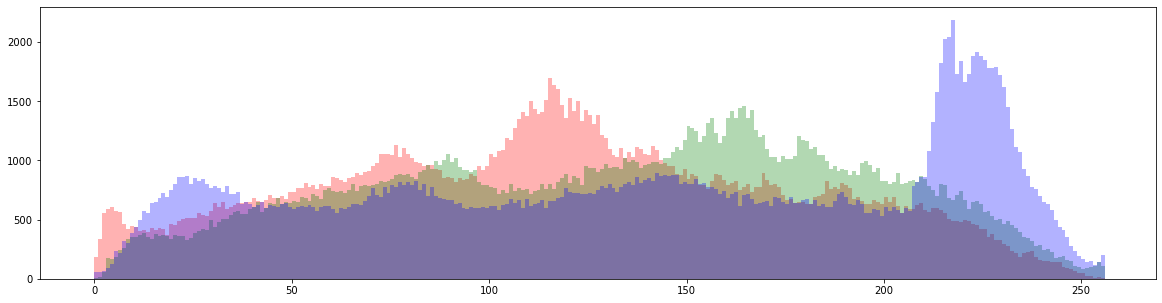

In [6]:
#r, g, b = np.transpose(z, (2, 0, 1))
r = z[:, :, 2].flatten()
g = z[:, :, 1].flatten()
b = z[:, :, 0].flatten()

bins = list(range(-1, 257))
fig, ax = plt.subplots(figsize=(20, 5))
ax.hist(r, bins, color='r', alpha=0.3)
ax.hist(g, bins, color='g', alpha=0.3)
ax.hist(b, bins, color='b', alpha=0.3)
plt.show()

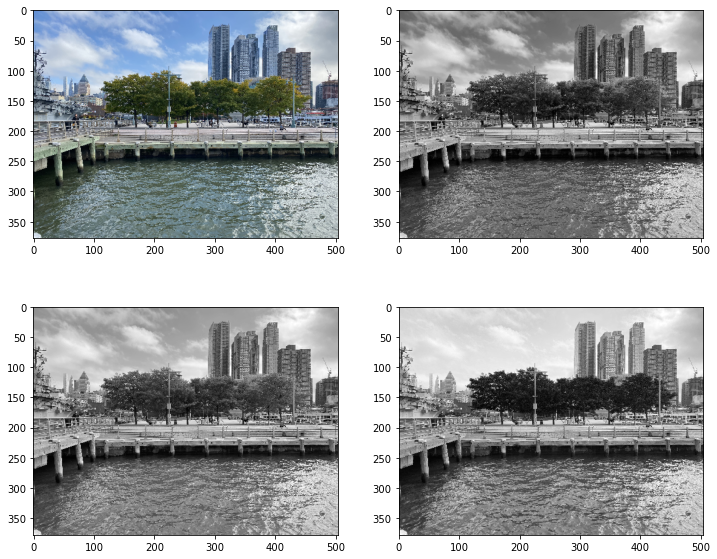

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ax[0, 0].imshow(z[:, :, ::-1])
ax[0, 1].imshow(z[:, :, 2], cmap='gray')
ax[1, 0].imshow(z[:, :, 1], cmap='gray')
ax[1, 1].imshow(z[:, :, 0], cmap='gray')
plt.show()

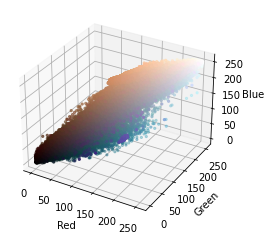

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

pixel_colors = z.reshape((np.shape(z)[0]*np.shape(z)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

ax.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")
plt.show()

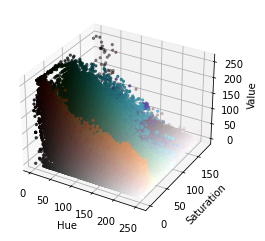

In [12]:
hsv = cv2.cvtColor(z, cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(v.flatten(), h.flatten(), s.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

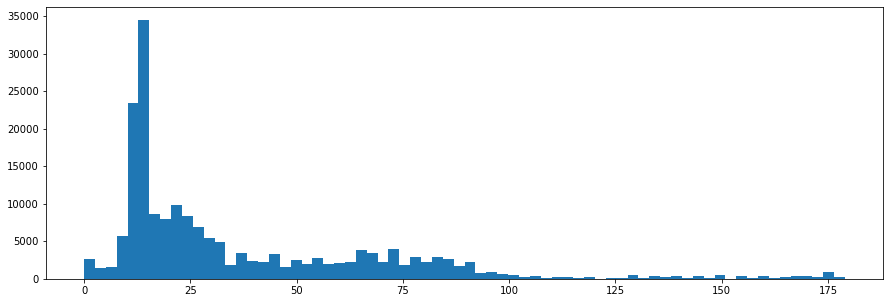

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(h.flatten(), 70)
plt.show()

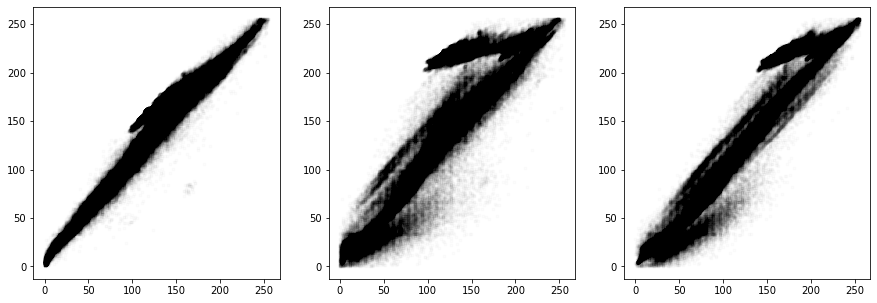

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(r, g, 'k.', alpha=0.01)
ax[1].plot(r, b, 'k.', alpha=0.01)
ax[2].plot(g, b, 'k.', alpha=0.01)
plt.show()

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(2)

In [25]:
Xt = pca.fit_transform(np.c_[r, g, b])

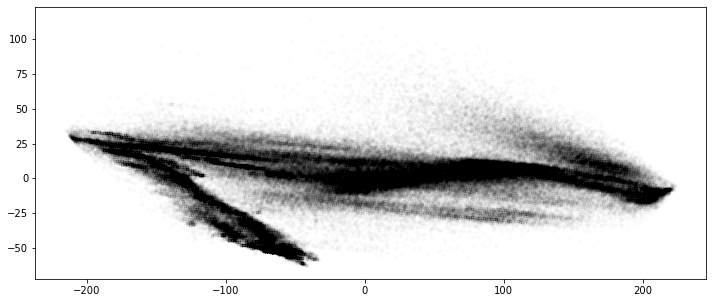

In [31]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(Xt[:, 0], Xt[:, 1], 'k.', alpha=0.01)
ax.set_aspect(1)
plt.show()